In [0]:
import pandas as pd
import numpy as np
import nltk

In [2]:
pwd

'/content'

In [3]:
cd '/content/drive/My Drive/Deep_Learning /Twitter_Sentiment_Analysis'

/content/drive/My Drive/Deep_Learning /Twitter_Sentiment_Analysis


In [4]:
ls

test.csv  train.csv  Twitter_Sentiment_Analysis_Code.ipynb


In [0]:
df = pd.read_csv('train.csv')

In [6]:
df.shape

(31962, 3)

In [7]:
df.head(n=15)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
print(len(df[df.label == 0]), 'Non-Hatred Tweets')
print(len(df[df.label == 1]), 'Hatred Tweets')

29720 Non-Hatred Tweets
2242 Hatred Tweets


# Cleaning data

In [0]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer,SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer

In [0]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")
ps = PorterStemmer()
sw = set(stopwords.words('english'))

In [0]:
def cleanTweet(text):
  text = text.lower()
  text = text.replace("<br /><br />"," ")
  text = text.replace("@user","")
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in sw]
  stemmed_tokens = [ps.stem(token) for token in new_tokens]
  cleaned_review = ' '.join(stemmed_tokens)
  return cleaned_review

In [0]:
df['cleaned_tweet'] = df.tweet.apply(cleanTweet)

In [15]:
df.head(n=15)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use caus offer wheelchair va...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talk leav chao pay disput ge...
6,7,0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0,the next school year is the year for exams.ð...,next school year year exam think school exam h...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cav champion cleveland clevela...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcom gr


# Creating Word Cloud for Hated Tweets

In [0]:
from wordcloud import WordCloud

In [18]:
hated_words = " ".join(df[df['label']==1].cleaned_tweet)
print(hated_words)

cnn call michigan middl school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin retweet agre lumpi say prove lumpi unbeliev st centuri need someth like neverump xenophobia let fight love peac white establish blk folx run around love promot great hey white peopl call peopl white race ident med altright use amp insecur lure men whitesupremaci interest linguist address race amp racism power raciolinguist bring mock obama black brexit peopl protest trump republican trump fuher amp ye call michelleobama gorilla racist long thought black peopl bet smaller hand show barri probabl lie knick game suck golf point one finger million point right back jewishsupremacist might libtard libtard sjw liber polit take trash america vote hate vote vote vot hold open door woman woman nice thing even tri deni man ran governor ny state biggest african american popul stereotyp prejudic offer hope solut creat old repetit hate conflict mani pol pass mani tim

In [0]:
import matplotlib.pyplot as plt

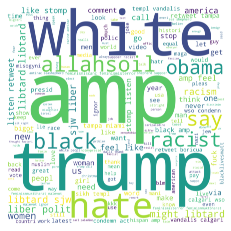

In [20]:
wordcloud = WordCloud(height=4000, width=4000, stopwords=sw, background_color='white')
wordcloud = wordcloud.generate(hated_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Creating Word Cloud for all Tweets

In [0]:
all_words = " ".join(df.cleaned_tweet)

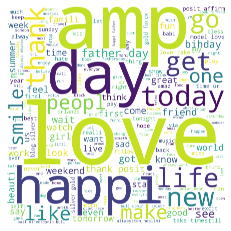

In [22]:
wordcloud2 = WordCloud(height=5000, width=5000, stopwords=sw, background_color='white')
wordcloud2 = wordcloud2.generate(all_words)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [0]:
countt = [29720,2242]

In [0]:
from collections import Counter

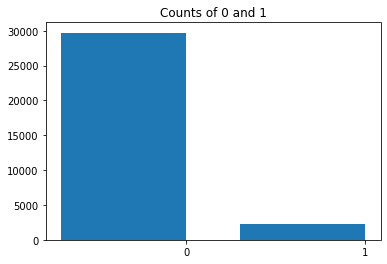

In [25]:
counter = Counter(df['label'])
labels = counter.keys()
counts = counter.values()
indexes = np.arange(len(labels))
width = 0.7
plt.bar(indexes,counts, width)
plt.xticks(indexes + width * 0.5, labels)
plt.title('Counts of 0 and 1')
plt.show()

# Building a Common Corpus

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [0]:
corpus = []
for i in range(0,31962):
    corpus.append(df['cleaned_tweet'][i])

In [18]:
cv = CountVectorizer(stop_words=sw)
cv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
X = cv.transform(corpus).toarray()
y = df.iloc[:,1].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [23]:
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6523489932885906
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5937
           1       0.84      0.53      0.65       456

    accuracy                           0.96      6393
   macro avg       0.90      0.76      0.82      6393
weighted avg       0.96      0.96      0.96      6393

[[5891   46]
 [ 213  243]]


In [0]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.9594869388393555